In [2]:
%load_ext autoreload
%autoreload 2
from get_mmap import get_mmap
import random

# Setup the necessary paths and parameters
fmap_profile = 'e2_bat_fb_alpha_raw_s_0_3071.raw'
fmap_attack = 'e2_bat_fb_beta_raw_s_0_3071.raw'
data_title = 'Templates A2D'
path_data = 'results/'
name_data = 'a2d_ab_bat_fb_templates_adapt_boffset_dlinear_n1000r_slr_g1000_r10.pkl'
rand_iter = 10
n_profile = 1000 # ensure that: n_profile + n_attack < nr_blocks
nr_traces_vec = list(range(1, 11)) + list(range(20, 101, 10)) + [200, 500, 1000]
inbytes = list(range(256))
atype = 'boffset'

# rng('default');
random.seed(0)

In [2]:
# Load file
print('Mapping data for profile...')
mmap_data_profile, metadata_profile = get_mmap(fmap_profile)
print('Mapping data for attack...')
mmap_data_attack, metadata_attack = get_mmap(fmap_attack)
print('Done mapping data')

Mapping data for profile...
Mapping data for attack...
Done mapping data


In [3]:
# Select idx for profile/attack
nr_blocks = 3072
idx = list(range(1, nr_blocks + 1))
idx_profile = [x for x in idx if x % 3 == 1 or x % 3 == 2]
idx_profile = random.choices(idx_profile, k=n_profile)  # Allows duplicates
# idx_profile = random.sample(idx_profile, n_profile) # This doesn't allow duplicates
idx_attack = [x for x in idx if x % 3 == 0]

# Set up attack/result cells
results = [None] * 4

In [4]:
from run_template_attack_adapt import run_template_attack_adapt
# Run attack for LDA, m=4

cmethod = 'LDA'
cparams = {
    'lda_dimensions': 4,
    'lda_threshold': 0.95
}
discriminant = 'linearnocov'
eparams = None  # TODO check if None or []
s_profile = {
    'mmap_data': [None],   # Initialize with None or any placeholder
    'metadata': [None],    # Same here
    'idx': [None]          # And here
}
s_profile['nr_sets'] = 1
s_profile['mmap_data'][0] = mmap_data_profile
s_profile['metadata'][0] = metadata_profile
s_profile['idx'][0] = idx_profile
s_helper = None  # TODO check if None or []

results[0] = run_template_attack_adapt(
    s_profile, s_helper,
    mmap_data_attack, metadata_attack, idx_attack,
    inbytes, atype, cmethod, cparams, discriminant,
    rand_iter, nr_traces_vec, eparams)

Running run_template_attack_adapt() ...
Obtaining sums of squares and cross products for all sets ...
Running compute_ssp_e2_mmap_multi()...
Computing the mean vectors M and the residual matrix W...
Computing the treatment matrix B...
M = [[-16833.792 -11970.56   -7143.168 ... -17737.728 -17650.432 -17437.952]
 [-16868.608 -11744.256  -7224.576 ... -17776.384 -17648.896 -17350.144]
 [-16861.696 -11699.712  -7137.28  ... -17774.592 -17650.432 -17402.88 ]
 ...
 [-16847.872 -11659.008  -7258.368 ... -17851.136 -17698.048 -17360.64 ]
 [-16811.008 -11664.128  -7214.848 ... -17664.768 -17536.    -17489.92 ]
 [-16831.488 -11716.864  -7167.488 ... -17728.256 -17656.576 -17434.88 ]]
B = [[ 6.00080238e+08  3.30193076e+08  1.20877072e+08 ...  2.53657628e+07
  -2.16245212e+07 -3.66913795e+07]
 [ 3.30193076e+08  4.21568878e+09  4.51994026e+08 ...  1.11356893e+08
   1.07695824e+08  1.87525900e+08]
 [ 1.20877072e+08  4.51994026e+08  7.03228019e+08 ...  2.69830554e+07
   6.25622057e+07  7.32747366e+07

In [5]:
# Run attack for LDA, m=5

cmethod = 'LDA'
cparams = {
    'lda_dimensions': 5,
    'lda_threshold': 0.95
}
discriminant = 'linearnocov'
eparams = None  # TODO check if None or []
s_profile = {
    'mmap_data': [None],   # Initialize with None or any placeholder
    'metadata': [None],    # Same here
    'idx': [None]          # And here
}
s_profile['nr_sets'] = 1
s_profile['mmap_data'][0] = mmap_data_profile
s_profile['metadata'][0] = metadata_profile
s_profile['idx'][0] = idx_profile
s_helper = None  # TODO check if None or []

results[1] = run_template_attack_adapt(
    s_profile, s_helper,
    mmap_data_attack, metadata_attack, idx_attack,
    inbytes, atype, cmethod, cparams, discriminant,
    rand_iter, nr_traces_vec, eparams)

Running run_template_attack_adapt() ...
Obtaining sums of squares and cross products for all sets ...
Running compute_ssp_e2_mmap_multi()...
Computing the mean vectors M and the residual matrix W...
Computing the treatment matrix B...
M = [[-16833.792 -11970.56   -7143.168 ... -17737.728 -17650.432 -17437.952]
 [-16868.608 -11744.256  -7224.576 ... -17776.384 -17648.896 -17350.144]
 [-16861.696 -11699.712  -7137.28  ... -17774.592 -17650.432 -17402.88 ]
 ...
 [-16847.872 -11659.008  -7258.368 ... -17851.136 -17698.048 -17360.64 ]
 [-16811.008 -11664.128  -7214.848 ... -17664.768 -17536.    -17489.92 ]
 [-16831.488 -11716.864  -7167.488 ... -17728.256 -17656.576 -17434.88 ]]
B = [[ 6.00080238e+08  3.30193076e+08  1.20877072e+08 ...  2.53657628e+07
  -2.16245212e+07 -3.66913795e+07]
 [ 3.30193076e+08  4.21568878e+09  4.51994026e+08 ...  1.11356893e+08
   1.07695824e+08  1.87525900e+08]
 [ 1.20877072e+08  4.51994026e+08  7.03228019e+08 ...  2.69830554e+07
   6.25622057e+07  7.32747366e+07

In [6]:
# Run attack for PCA, m=4

cmethod = 'PCA'
cparams = {
    'pca_threshold': 0.95,
    'pca_alternate': 0,
    'pca_dimensions': 4
}
discriminant = 'linear'
eparams = None  # TODO check if None or []
s_profile = {
    'mmap_data': [None],   # Initialize with None or any placeholder
    'metadata': [None],    # Same here
    'idx': [None]          # And here
}
s_profile['nr_sets'] = 1
s_profile['mmap_data'][0] = mmap_data_profile
s_profile['metadata'][0] = metadata_profile
s_profile['idx'][0] = idx_profile
s_helper = None  # TODO check if None or []

results[2] = run_template_attack_adapt(
    s_profile, s_helper,
    mmap_data_attack, metadata_attack, idx_attack,
    inbytes, atype, cmethod, cparams, discriminant,
    rand_iter, nr_traces_vec, eparams)

Running run_template_attack_adapt() ...
Obtaining sums of squares and cross products for all sets ...
Running compute_ssp_e2_mmap_multi()...
Computing the mean vectors M and the residual matrix W...
Computing the treatment matrix B...
M = [[-16833.792 -11970.56   -7143.168 ... -17737.728 -17650.432 -17437.952]
 [-16868.608 -11744.256  -7224.576 ... -17776.384 -17648.896 -17350.144]
 [-16861.696 -11699.712  -7137.28  ... -17774.592 -17650.432 -17402.88 ]
 ...
 [-16847.872 -11659.008  -7258.368 ... -17851.136 -17698.048 -17360.64 ]
 [-16811.008 -11664.128  -7214.848 ... -17664.768 -17536.    -17489.92 ]
 [-16831.488 -11716.864  -7167.488 ... -17728.256 -17656.576 -17434.88 ]]
B = [[ 6.00080238e+08  3.30193076e+08  1.20877072e+08 ...  2.53657628e+07
  -2.16245212e+07 -3.66913795e+07]
 [ 3.30193076e+08  4.21568878e+09  4.51994026e+08 ...  1.11356893e+08
   1.07695824e+08  1.87525900e+08]
 [ 1.20877072e+08  4.51994026e+08  7.03228019e+08 ...  2.69830554e+07
   6.25622057e+07  7.32747366e+07

In [7]:
# Run attack for PCA, m=5

cmethod = 'PCA'
cparams = {
    'pca_threshold': 0.95,
    'pca_alternate': 0,
    'pca_dimensions': 5
}
discriminant = 'linear'
eparams = None  # TODO check if None or []
s_profile = {
    'mmap_data': [None],   # Initialize with None or any placeholder
    'metadata': [None],    # Same here
    'idx': [None]          # And here
}
s_profile['nr_sets'] = 1
s_profile['mmap_data'][0] = mmap_data_profile
s_profile['metadata'][0] = metadata_profile
s_profile['idx'][0] = idx_profile
s_helper = None  # TODO check if None or []

results[3] = run_template_attack_adapt(
    s_profile, s_helper,
    mmap_data_attack, metadata_attack, idx_attack,
    inbytes, atype, cmethod, cparams, discriminant,
    rand_iter, nr_traces_vec, eparams)

Running run_template_attack_adapt() ...
Obtaining sums of squares and cross products for all sets ...
Running compute_ssp_e2_mmap_multi()...
Computing the mean vectors M and the residual matrix W...
Computing the treatment matrix B...
M = [[-16833.792 -11970.56   -7143.168 ... -17737.728 -17650.432 -17437.952]
 [-16868.608 -11744.256  -7224.576 ... -17776.384 -17648.896 -17350.144]
 [-16861.696 -11699.712  -7137.28  ... -17774.592 -17650.432 -17402.88 ]
 ...
 [-16847.872 -11659.008  -7258.368 ... -17851.136 -17698.048 -17360.64 ]
 [-16811.008 -11664.128  -7214.848 ... -17664.768 -17536.    -17489.92 ]
 [-16831.488 -11716.864  -7167.488 ... -17728.256 -17656.576 -17434.88 ]]
B = [[ 6.00080238e+08  3.30193076e+08  1.20877072e+08 ...  2.53657628e+07
  -2.16245212e+07 -3.66913795e+07]
 [ 3.30193076e+08  4.21568878e+09  4.51994026e+08 ...  1.11356893e+08
   1.07695824e+08  1.87525900e+08]
 [ 1.20877072e+08  4.51994026e+08  7.03228019e+08 ...  2.69830554e+07
   6.25622057e+07  7.32747366e+07

In [8]:
import os
import pickle

# Save data to disk so you can prevent wasting time
print('All done, saving data...\n')
os.makedirs(path_data, exist_ok=True)

with open(os.path.join(path_data, name_data), 'wb') as f:
    pickle.dump(results, f)

All done, saving data...



In [29]:
import os
import pickle
import numpy as np

with open(os.path.join(path_data, name_data), 'rb') as f:
    data = pickle.load(f)
def disp_s_profile(s_profile):
    print(f"      nr_sets: {s_profile['nr_sets']}")
    
    mmap_data_info = f"[{len(s_profile['mmap_data'])}×1 mmapfile]" if s_profile['mmap_data'] else "[]"
    print(f"    mmap_data: {mmap_data_info}")
    
    metadata_info = f"[{len(s_profile['metadata'])}×1 struct]" if s_profile['metadata'] else "[]"
    print(f"     metadata: {metadata_info}")
    
    idx_array = s_profile['idx'][0]
    idx_info = f"{idx_array[1:5]}, length={len(idx_array)}"
    # idx_info = f"[{len(idx_array)}×{idx_array // len(idx_array) if len(idx_array) > 0 else 0} double]" if len(idx_array) > 0 else "[]"
    print(f"          idx: {idx_info}")
def pretty(d, indent=0):
    indent_str = '\t' * indent
    for key, value in d.items():
        if isinstance(value, dict):
            print(f"{indent_str}{str(key)} (dict, size: {len(value)})")
            pretty(value, indent + 1)
        elif isinstance(value, list):
            print(f"{indent_str}{str(key)} (list, size: {len(value)})")
            for item in value:
                if isinstance(item, dict):
                    pretty(item, indent + 1)
                elif isinstance(item, list):
                    # Handling multi-line lists of lists or similar structures
                    print(f"{indent_str}\t[List of size: {len(item)}]")
                    for subitem in item:
                        subitem_str = str(subitem)
                        subitem_str = subitem_str.replace('\n', f'\n{indent_str}\t\t')
                        print(f"{indent_str}\t\t{subitem_str}")
                else:
                    item_str = str(item)
                    item_str = item_str.replace('\n', f'\n{indent_str}\t')
                    print(f"{indent_str}\t{item_str}")
        elif isinstance(value, (np.ndarray, list)):
            # For numpy arrays or lists, display their shape/length
            if isinstance(value, np.ndarray):
                print(f"{indent_str}{str(key)}: (ndarray, shape: {value.shape})")
            else:
                print(f"{indent_str}{str(key)}: (list, size: {len(value)})")
            value_str = str(value)
            value_str = value_str.replace('\n', f'\n{indent_str}\t')
            print(f"{indent_str}\t{value_str}")
        else:
            # For other types, just print the key and value
            value_str = str(value)
            value_str = value_str.replace('\n', f'\n{indent_str}\t')
            print(f"{indent_str}{str(key)}: {value_str}")

# disp_s_profile(data[0]['s_profile'])
pretty(data[0])


s_profile (dict, size: 4)
	mmap_data (list, size: 1)
		rindex: (ndarray, shape: (8,))
			[ 8  9 10 11 12 13 14 15]
		X: (ndarray, shape: (2500, 786432))
			[[-16128 -16896 -17408 ... -14848 -16896 -18176]
			 [-12032  -7680 -16896 ... -11776 -12800 -12032]
			 [ -7424  -7936  -8448 ...  -6400  -6400  -6144]
			 ...
			 [-17152 -19968 -18176 ... -21248 -20480 -16896]
			 [-18944 -17408 -18176 ... -17664 -18432 -19200]
			 [-19200 -19200 -18944 ... -17152 -16896 -18176]]
		B: (ndarray, shape: (8, 786432))
			[[  0   0   0 ...   0   0   0]
			 [159  77 169 ... 120 251 106]
			 [  0   0   0 ...   0   0   0]
			 ...
			 [  0   0   0 ...   0   0   0]
			 [  0   0   0 ...   0   0   0]
			 [  0   0   0 ...   0   0   0]]
		R: (ndarray, shape: (8, 786432))
			[[0 0 0 ... 0 0 0]
			 [0 0 0 ... 0 0 0]
			 [0 0 0 ... 0 0 0]
			 ...
			 [0 0 0 ... 0 0 0]
			 [0 0 0 ... 0 0 0]
			 [0 0 0 ... 0 0 0]]
	metadata (list, size: 1)
		format: rawe2
		machinefmt: <
		nr_trials: 786432
		nr_groups: 256
		nr_po

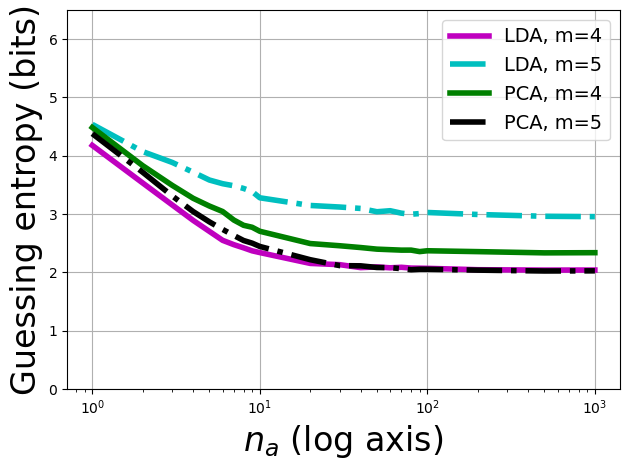

In [16]:
import os
import pickle
from do_show_results_templates_a2_bat_fb import get_ge_from_success_info, get_line_properties_templates, make_figures_ge
from get_uid_cmethod import get_uid_cmethod
import matplotlib.pyplot as plt
import numpy as np

with open(os.path.join(path_data, name_data), 'rb') as f:
    data = pickle.load(f)

# fdata = f'results/{name_data}.pkl'
rpath = 'figures/'
font_size = 24
options = 'gp'
yrange = [0, 6.5]
# yrange = [0, 7]
nr_traces_vec = list(range(1, 11)) + list(range(20, 101, 10)) + [200, 500, 1000]
len_na_vec = len(nr_traces_vec)

# Reset environment
plt.close('all')

# nump = data[0]['x_profile'].shape[0]
nump = len(data[0]['s_profile']['idx'][0])
# nump = 1000
rand_iter = data[0]['rand_iter']
# nr_exp_ab = len(data)
nr_exp_ab = 4
L = [None] * nr_exp_ab
G = np.zeros((nr_exp_ab, len_na_vec))
slines_ab = [None] * nr_exp_ab
style = 'normal'

for k in range(nr_exp_ab):
    cmethod = data[k]['cmethod']
    if cmethod == 'sample':
        L[k] = f"{cmethod}, {data[k]['cparams']['sel']}"
    elif cmethod == 'PCA':
        L[k] = f"{cmethod}, m={data[k]['cparams']['pca_dimensions']}"
    elif cmethod == 'LDA':
        L[k] = f"{cmethod}, m={data[k]['cparams']['lda_dimensions']}"
    g = get_ge_from_success_info(data[k]['success_info'], nr_traces_vec)
    G[k, :] = g['joint']
    # uid = get_uid_cmethod(cmethod, results[k]['cparams'])
    slines_ab[k] = get_line_properties_templates(k, style)

# Plot results
title_results = "" #f"A2D AB, BOFFSET, BAT FB, nump={nump}"
rprefix = f"a2d_ab_bat_fb_boffset_dlinear_n{nump}r_ls_r{rand_iter}_"
make_figures_ge(G, nr_traces_vec, rpath, rprefix, title_results, L, font_size, slines_ab, options, yrange)
